# Load Mass Spectrum and calculate metrics

In [2]:
import nomspectra.draw as draw
from nomspectra.spectrum import Spectrum

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load and save

Load mass spectrum from csv file. When loading, if the headings of m/z and intensity are not default ("mass", "intensity"), you must specify them by mapper. You also need to specify a separator (default is ","). In order not to load unnecessary data, we will also set the take_only_mz flag True. 

In [3]:
spec = Spectrum.read_csv(filename = "data/sample2.txt",
                            mapper = {'m/z':'mass', "I":'intensity'},
                            take_only_mz = True,
                            sep = ',',
                            )

Now we can plot spectrum

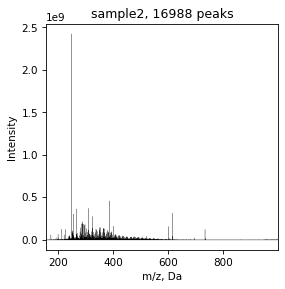

In [4]:
draw.spectrum(spec)

The next step is assignement of brutto formulas for the masses. By default, this process is performed on the following range of elements: 'C' from 4 to 50, 'H' from 4 to 100, 'O' from 0 to 25, 'N' from 0 to 3, 'S' from 0 to 2. The following rules are also followed by default: 0.25<H/C<2.2, O/C < 1, nitogen parity, DBE-O <= 10.

We can specify elements by brutto_dict parameters as bellow. If you want use isotopes use "_" and number, for example "C_13"

rel_error is allowable relative error. By default it is 0.5

In [5]:
spec = spec.assign(brutto_dict={'C':(4,51), 'C_13':(0,3), 'H':(4,101), 'O':(0, 26), 'N':(0,3)}, rel_error=0.5)

Now you can see masses with brutto formulas. But first we can drop unassigned formulas

In [6]:
spec = spec.drop_unassigned()
spec.table

,mass,intensity,assign,charge,C,C_13,H,O,N
0,154.99860,859894,True,1,6.0,0.0,4.0,5.0,0.0
1,155.03499,891203,True,1,7.0,0.0,8.0,4.0,0.0
2,157.01426,1361859,True,1,6.0,0.0,6.0,5.0,0.0
3,157.05064,645765,True,1,7.0,0.0,10.0,4.0,0.0
4,157.12341,2161662,True,1,9.0,0.0,18.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
5534,962.28043,1362772,True,1,47.0,1.0,50.0,21.0,0.0
5535,971.46886,1278341,True,1,46.0,1.0,73.0,20.0,1.0
5536,978.49917,1492271,True,1,46.0,1.0,78.0,21.0,0.0
5537,992.50554,1407980,True,1,49.0,1.0,76.0,18.0,2.0


After assignment we can calculate different metrics: H/C, O/C, CRAM, NOSC, AI, DBE and other. We can do it separate by such methods as calc_ai, calc_dbe ... or do all by one command calc_all_metrics

In [7]:
spec = spec.calc_all_metrics()

Now we can see all metrics

In [8]:
spec.table.columns

Index(['mass', 'intensity', 'assign', 'charge', 'C', 'C_13', 'H', 'O', 'N',
       'calc_mass', 'abs_error', 'rel_error', 'DBE', 'DBE-O', 'DBE_AI', 'CAI',
       'AI', 'DBE-OC', 'H/C', 'O/C', 'class', 'CRAM', 'NOSC', 'brutto', 'Ke',
       'KMD'],
      dtype='object')

You can save the data with spectrum and calculated metrics to a csv file at any time by to_csv method

In [9]:
spec.to_csv('temp.csv')

## Draw

Data can be visualized by different methods

Simple Van-Krevelen diagramm. By default CHO formulas is blue, CHON is orange, CHOS is green, CHONS is red. There is no S, so it is only two colors here

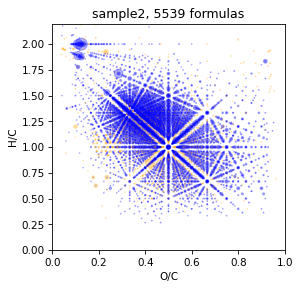

In [10]:
draw.vk(spec)

We can plot it with density axis

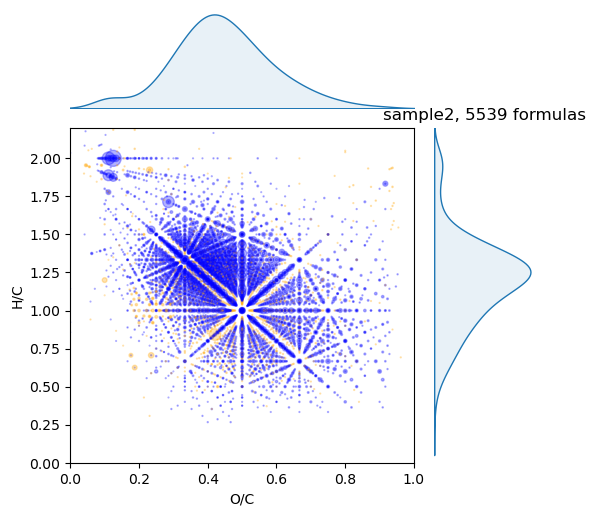

In [11]:
draw.vk(spec, draw.scatter_density)

Or do it with any of metrics in spectrum. For example, NOSC vs DBE-OC

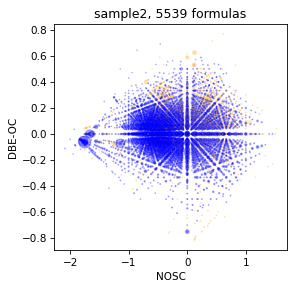

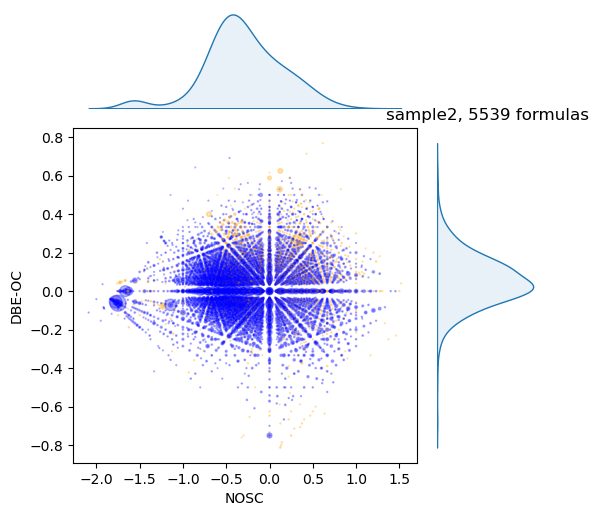

In [12]:
draw.scatter(spec, x='NOSC', y='DBE-OC')
draw.scatter_density(spec, x='NOSC', y='DBE-OC')


We can plot separate density

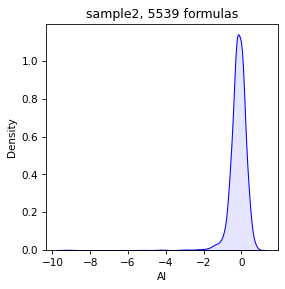

In [13]:
draw.density(spec, 'AI')

Or plot 2D kernel density scatter

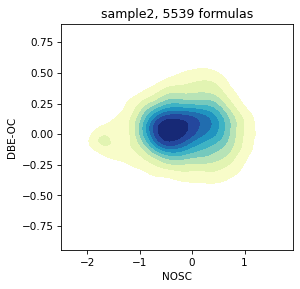

In [14]:
draw.density_2D(spec, x='NOSC', y='DBE-OC')

We can plot Kendric diagramm by command

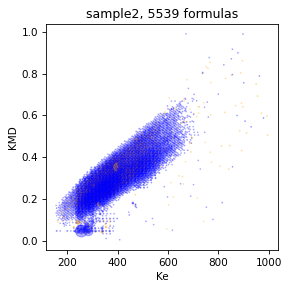

In [15]:
draw.scatter(spec, x='Ke', y='KMD')

## Molecular class

We can get average density of molecular classes of brutto formulas in spectrum

In [16]:
spec.get_mol_class()

,class,density
0,aminosugar,0.000000
1,carbohydrate,0.004535
2,lignin,0.285902
3,lipid,0.039523
4,peptide,0.187282
5,tannin,0.166226
6,undefinded,0.316533


## Metrics

We can get any metrics that avarage by weight of intensity.

In [17]:
spec.get_mol_metrics()

,metric,value
0,AI,-0.060187
1,C,18.565293
2,CAI,10.421713
3,CRAM,0.686021
4,C_13,0.178269
5,DBE,8.524864
6,DBE-O,0.293000
7,DBE-OC,0.010020
8,DBE_AI,0.203016
9,H,22.527379


In [18]:
spec.get_mol_metrics(metrics=['AI', 'DBE', 'NOSC', 'H/C', 'O/C'])

,metric,value
0,AI,-0.060187
1,DBE,8.524864
2,H/C,1.200569
3,NOSC,-0.286562
4,O/C,0.449121


We can avarage the same by mean or other function(max, min, std, median)

In [19]:
spec.get_mol_metrics(metrics=['AI', 'DBE', 'NOSC', 'H/C', 'O/C'], func='mean')

,metric,value
0,AI,-0.114878
1,DBE,10.076909
2,H/C,1.128264
3,NOSC,-0.159393
4,O/C,0.462438


Also we can split VanKrevelen diagramm to squares and calculate density in each squares

,value,square
0,0.000141,1
1,0.004198,2
2,0.015933,3
3,0.009930,4
4,0.034484,5
5,0.004519,6
6,0.056869,7
7,0.388838,8
8,0.116924,9
9,0.002946,10


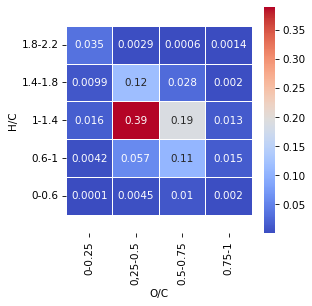

In [20]:
spec.get_squares_vk(draw=True)

It may also be useful to calculate the dependence od DBE vs nO. By fit the slope we can determinen state of sample

(0.7186331116360536, 2.7479134657180664)

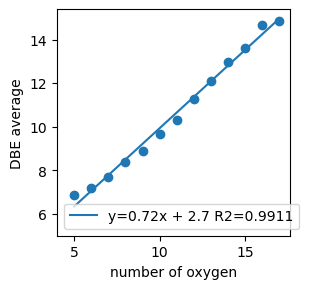

In [21]:
spec.get_dbe_vs_o(draw=True, olim=(5, 18))

Using the obtained metrics, it is possible to classify samples by origin or property, train different models.